In [ ]:
#import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from gensim.corpora.dictionary import Dictionary
from gensim import models
from gensim.models.coherencemodel import CoherenceModel
from nltk.tokenize import RegexpTokenizer #전처리할때 사용
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
wnl = WordNetLemmatizer()

In [ ]:
#making corpus or dataset with four text documents
cps1 = 'This is the first public legal document about democratic political system, based on checks and balance, published in 1870.'
cps2 = 'This document is the second academic document on the balance and control of power in democratic nation states published 1880.'
cps3 = 'And this is a document about the roles of legal system, checking and balancing political power, in American democracy.'
cps4 = 'He wrote a document about economic development in 1979 and published also a book about democracy and economy in 1980.'
cps5 = 'In a document, it is said that democracy might not be helpful for economic development, but economic development can bring forth democracy.'
cps6 = 'A document said that government investment in infrastructure and education is key for economic development and wealth of nations.'
cps7 = 'This is a research document, published in 1963, about the role of education in economic growth and development of nations.'
cps8 = 'My document said that entrepreneurship education has been identified as a key variable needed for fast economic growth and development.'
cps9 = 'History tells in a document that political stability is one of requirements for economic development and democracy.'

# make document list
corpus = [cps1, cps2, cps3, cps4, cps5, cps6, cps7, cps8, cps9]
corpus_name = ['cps1','cps2','cps3','cps4','cps5','cps6','cps7','cps8','cps9']


In [ ]:
## Step 1. 전처리 & 문서의 token 화 & Dictionary 만들기
# n-gram vectorization : 단어로 자르기
# ngram_range=(a,b) where a is the minimum and b is the maximum size of ngrams
# min_df, max_df : 빈도
# max_features : choose the words/features that occur most frequently to be in its’ vocabulary and drop everything else
corpus2vec2 = CountVectorizer(stop_words='english', ngram_range=(1,1), min_df=0.1, max_df=0.7, max_features=100)
bigram = corpus2vec2.fit_transform(corpus)
print(corpus2vec2.get_feature_names_out())
#print(corpus2vec2.vocabulary_)



['1870' '1880' '1963' '1979' '1980' 'academic' 'american' 'balance'
 'balancing' 'based' 'book' 'bring' 'checking' 'checks' 'control'
 'democracy' 'democratic' 'development' 'economic' 'economy' 'education'
 'entrepreneurship' 'fast' 'forth' 'government' 'growth' 'helpful'
 'history' 'identified' 'infrastructure' 'investment' 'key' 'legal'
 'nation' 'nations' 'needed' 'political' 'power' 'public' 'published'
 'requirements' 'research' 'role' 'roles' 'said' 'second' 'stability'
 'states' 'tells' 'variable' 'wealth' 'wrote']


In [ ]:
#document-term matrix
bigramdtx = pd.DataFrame(bigram.toarray(), index = corpus_name, columns = corpus2vec2.get_feature_names_out())
bigramdtx

#특정 단어 제외하고 싶을때
#bigramdtx1 = bigramdtx.drop(['document'],axis=1)
#bigramdtx1

,1870,1880,1963,1979,1980,academic,american,balance,balancing,based,...,role,roles,said,second,stability,states,tells,variable,wealth,wrote
cps1,1,0,0,0,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
cps2,0,1,0,0,0,1,0,1,0,0,...,0,0,0,1,0,1,0,0,0,0
cps3,0,0,0,0,0,0,1,0,1,0,...,0,1,0,0,0,0,0,0,0,0
cps4,0,0,0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
cps5,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
cps6,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
cps7,0,0,1,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
cps8,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
cps9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,0


In [ ]:
# Calculating document tf-idf matrix : 확률로 나타내기
corpustfidf = TfidfVectorizer(stop_words='english').fit(bigramdtx)
corpustfidfdtx = pd.DataFrame(corpustfidf.transform(corpus).toarray(),index=corpus_name, columns=corpustfidf.get_feature_names_out())
corpustfidfdtx

,1870,1880,1963,1979,1980,academic,american,balance,balancing,based,...,role,roles,said,second,stability,states,tells,variable,wealth,wrote
cps1,0.333333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.333333,0.000000,0.333333,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
cps2,0.000000,0.316228,0.000000,0.000000,0.000000,0.316228,0.000000,0.316228,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.316228,0.000000,0.316228,0.000000,0.000000,0.000000,0.000000
cps3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.353553,0.000000,0.353553,0.000000,...,0.000000,0.353553,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
cps4,0.000000,0.000000,0.000000,0.333333,0.333333,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.333333
cps5,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
cps6,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.316228,0.000000,0.000000,0.000000,0.000000,0.000000,0.316228,0.000000
cps7,0.000000,0.000000,0.333333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.333333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
cps8,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.301511,0.000000,0.000000,0.000000,0.000000,0.301511,0.000000,0.000000
cps9,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.353553,0.000000,0.353553,0.000000,0.000000,0.000000


In [ ]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

mystpwd = stopwords.words('english')
print(mystpwd[-5:])
print(len(mystpwd),type(mystpwd))
print('document' in mystpwd)

["weren't", 'won', "won't", 'wouldn', "wouldn't"]
179 <class 'list'>
False


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
#make unique word list by document
import nltk
nltk.download('all')
tokenizer = RegexpTokenizer(r'\w+') #splits a string into substrings using a regular expression
en_stop = mystpwd
p_stemmer = PorterStemmer()  #removing the commoner morphological and inflexional endings from words in English
#Stemming vs Lemmatizing
#Stemming just removes or stems the last few characters of a word, often leading to incorrect meanings and spelling.
#Lemmatization considers the context and converts the word to its meaningful base form, which is called Lemma.

texts=[]
for i in corpus:
    raw = i.lower()
    tokens = tokenizer.tokenize(raw)
    stopped_tokens = [i for i in tokens if not i in en_stop]
    #stemmed_tokens = [p_stemmer.stem(i) for i in stopped_tokens]
    lemmatized_words = [wnl.lemmatize(i) for i in stopped_tokens]
    texts.append(lemmatized_words)

print(texts)

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping grammars/basque_grammars.zip.
[nltk_data]    | Downloading package bcp47 to /root/nltk_data...
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/n

[['first', 'public', 'legal', 'document', 'democratic', 'political', 'system', 'based', 'check', 'balance', 'published', '1870'], ['document', 'second', 'academic', 'document', 'balance', 'control', 'power', 'democratic', 'nation', 'state', 'published', '1880'], ['document', 'role', 'legal', 'system', 'checking', 'balancing', 'political', 'power', 'american', 'democracy'], ['wrote', 'document', 'economic', 'development', '1979', 'published', 'also', 'book', 'democracy', 'economy', '1980'], ['document', 'said', 'democracy', 'might', 'helpful', 'economic', 'development', 'economic', 'development', 'bring', 'forth', 'democracy'], ['document', 'said', 'government', 'investment', 'infrastructure', 'education', 'key', 'economic', 'development', 'wealth', 'nation'], ['research', 'document', 'published', '1963', 'role', 'education', 'economic', 'growth', 'development', 'nation'], ['document', 'said', 'entrepreneurship', 'education', 'identified', 'key', 'variable', 'needed', 'fast', 'economic'

In [ ]:
for i in range(len(texts)):
    print(f'{corpus_name[i]}:{texts[i]}')

cps1:['first', 'public', 'legal', 'document', 'democratic', 'political', 'system', 'based', 'check', 'balance', 'published', '1870']
cps2:['document', 'second', 'academic', 'document', 'balance', 'control', 'power', 'democratic', 'nation', 'state', 'published', '1880']
cps3:['document', 'role', 'legal', 'system', 'checking', 'balancing', 'political', 'power', 'american', 'democracy']
cps4:['wrote', 'document', 'economic', 'development', '1979', 'published', 'also', 'book', 'democracy', 'economy', '1980']
cps5:['document', 'said', 'democracy', 'might', 'helpful', 'economic', 'development', 'economic', 'development', 'bring', 'forth', 'democracy']
cps6:['document', 'said', 'government', 'investment', 'infrastructure', 'education', 'key', 'economic', 'development', 'wealth', 'nation']
cps7:['research', 'document', 'published', '1963', 'role', 'education', 'economic', 'growth', 'development', 'nation']
cps8:['document', 'said', 'entrepreneurship', 'education', 'identified', 'key', 'variabl

In [ ]:
# Token id for each unique word and mapping between 'token id' and 'numbers' : Dictionary 만들기
dictionary = Dictionary(texts)
print(dictionary.token2id)
print(dictionary[51])

{'1870': 0, 'balance': 1, 'based': 2, 'check': 3, 'democratic': 4, 'document': 5, 'first': 6, 'legal': 7, 'political': 8, 'public': 9, 'published': 10, 'system': 11, '1880': 12, 'academic': 13, 'control': 14, 'nation': 15, 'power': 16, 'second': 17, 'state': 18, 'american': 19, 'balancing': 20, 'checking': 21, 'democracy': 22, 'role': 23, '1979': 24, '1980': 25, 'also': 26, 'book': 27, 'development': 28, 'economic': 29, 'economy': 30, 'wrote': 31, 'bring': 32, 'forth': 33, 'helpful': 34, 'might': 35, 'said': 36, 'education': 37, 'government': 38, 'infrastructure': 39, 'investment': 40, 'key': 41, 'wealth': 42, '1963': 43, 'growth': 44, 'research': 45, 'entrepreneurship': 46, 'fast': 47, 'identified': 48, 'needed': 49, 'variable': 50, 'history': 51, 'one': 52, 'requirement': 53, 'stability': 54, 'tell': 55}
history


In [ ]:
# Token id and frequency in corpus
print(dictionary.cfs, end= '')
print(sorted(dictionary.cfs.items()),end='')

{6: 1, 9: 1, 7: 2, 5: 10, 4: 2, 8: 3, 11: 2, 2: 1, 3: 1, 1: 2, 10: 4, 0: 1, 17: 1, 13: 1, 14: 1, 16: 2, 15: 3, 18: 1, 12: 1, 23: 2, 21: 1, 20: 1, 19: 1, 22: 5, 31: 1, 29: 7, 28: 7, 24: 1, 26: 1, 27: 1, 30: 1, 25: 1, 36: 3, 35: 1, 34: 1, 32: 1, 33: 1, 38: 1, 40: 1, 39: 1, 37: 3, 41: 2, 42: 1, 45: 1, 43: 1, 44: 2, 46: 1, 48: 1, 50: 1, 49: 1, 47: 1, 51: 1, 55: 1, 54: 1, 52: 1, 53: 1}[(0, 1), (1, 2), (2, 1), (3, 1), (4, 2), (5, 10), (6, 1), (7, 2), (8, 3), (9, 1), (10, 4), (11, 2), (12, 1), (13, 1), (14, 1), (15, 3), (16, 2), (17, 1), (18, 1), (19, 1), (20, 1), (21, 1), (22, 5), (23, 2), (24, 1), (25, 1), (26, 1), (27, 1), (28, 7), (29, 7), (30, 1), (31, 1), (32, 1), (33, 1), (34, 1), (35, 1), (36, 3), (37, 3), (38, 1), (39, 1), (40, 1), (41, 2), (42, 1), (43, 1), (44, 2), (45, 1), (46, 1), (47, 1), (48, 1), (49, 1), (50, 1), (51, 1), (52, 1), (53, 1), (54, 1), (55, 1)]

In [ ]:
##Dictionary 관련 (활용하는 방법)
# Document frequency with a token
docfreq = dictionary.dfs
print(docfreq, end = '')
print({k:v for k,v in sorted(docfreq.items(), key=lambda x:x[1], reverse=True)})
print(max(docfreq.items(), key =lambda x:x[1]))

# Series 형태로 만들기
docfreq_sr = pd.Series(docfreq, index=docfreq.keys())
docfreq_sr[docfreq_sr>4]

# Removing common words across all documents
dictionary.filter_n_most_frequent(1) # 횟수를 최대 1까지
len(dictionary)
print(dictionary.token2id)

{6: 1, 9: 1, 7: 2, 5: 9, 4: 2, 8: 3, 11: 2, 2: 1, 3: 1, 1: 2, 10: 4, 0: 1, 17: 1, 13: 1, 14: 1, 16: 2, 15: 3, 18: 1, 12: 1, 23: 2, 21: 1, 20: 1, 19: 1, 22: 4, 31: 1, 29: 6, 28: 6, 24: 1, 26: 1, 27: 1, 30: 1, 25: 1, 36: 3, 35: 1, 34: 1, 32: 1, 33: 1, 38: 1, 40: 1, 39: 1, 37: 3, 41: 2, 42: 1, 45: 1, 43: 1, 44: 2, 46: 1, 48: 1, 50: 1, 49: 1, 47: 1, 51: 1, 55: 1, 54: 1, 52: 1, 53: 1}{5: 9, 29: 6, 28: 6, 10: 4, 22: 4, 8: 3, 15: 3, 36: 3, 37: 3, 7: 2, 4: 2, 11: 2, 1: 2, 16: 2, 23: 2, 41: 2, 44: 2, 6: 1, 9: 1, 2: 1, 3: 1, 0: 1, 17: 1, 13: 1, 14: 1, 18: 1, 12: 1, 21: 1, 20: 1, 19: 1, 31: 1, 24: 1, 26: 1, 27: 1, 30: 1, 25: 1, 35: 1, 34: 1, 32: 1, 33: 1, 38: 1, 40: 1, 39: 1, 42: 1, 45: 1, 43: 1, 46: 1, 48: 1, 50: 1, 49: 1, 47: 1, 51: 1, 55: 1, 54: 1, 52: 1, 53: 1}
(5, 9)
{'1870': 0, 'balance': 1, 'based': 2, 'check': 3, 'democratic': 4, 'first': 5, 'legal': 6, 'political': 7, 'public': 8, 'published': 9, 'system': 10, '1880': 11, 'academic': 12, 'control': 13, 'nation': 14, 'power': 15, 'second'

In [ ]:
##Step 2. Document-Word frequency table 다큐먼트 별로 단어가 몇번 나왔는지
doc_term_matrix = [dictionary.doc2bow(i) for i in texts]
for i in range(len(doc_term_matrix)):
    print(f'{corpus_name[i]}:{doc_term_matrix[i]}')


cps1:[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1)]
cps2:[(1, 1), (4, 1), (9, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1)]
cps3:[(6, 1), (7, 1), (10, 1), (15, 1), (18, 1), (19, 1), (20, 1), (21, 1), (22, 1)]
cps4:[(9, 1), (21, 1), (23, 1), (24, 1), (25, 1), (26, 1), (27, 1), (28, 1), (29, 1), (30, 1)]
cps5:[(21, 2), (27, 2), (28, 2), (31, 1), (32, 1), (33, 1), (34, 1), (35, 1)]
cps6:[(14, 1), (27, 1), (28, 1), (35, 1), (36, 1), (37, 1), (38, 1), (39, 1), (40, 1), (41, 1)]
cps7:[(9, 1), (14, 1), (22, 1), (27, 1), (28, 1), (36, 1), (42, 1), (43, 1), (44, 1)]
cps8:[(27, 1), (28, 1), (35, 1), (36, 1), (40, 1), (43, 1), (45, 1), (46, 1), (47, 1), (48, 1), (49, 1)]
cps9:[(7, 1), (21, 1), (27, 1), (28, 1), (50, 1), (51, 1), (52, 1), (53, 1), (54, 1)]


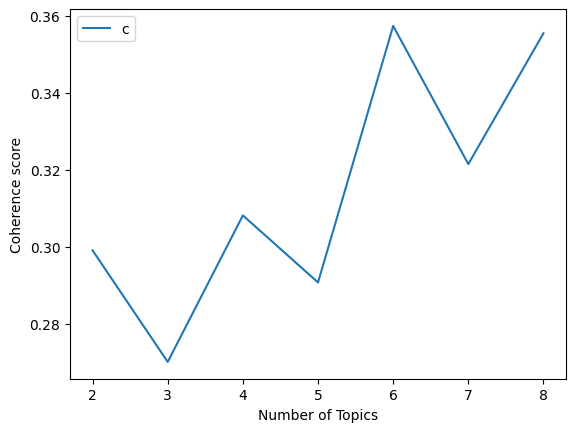

In [ ]:
## -Step 3. 최적의 토픽수 계산 How many topics? with coherence model
#coherence value: 값이 높을수록 의미론적 일관성이 좋음.
num_tps = 3
coherence_values=[]
model_list=[]
for n_topics in range(2,9,1):
    model=models.ldamodel.LdaModel(doc_term_matrix, num_topics=num_tps, id2word=dictionary)
    model_list.append(model)
    coherencemodel=CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
    coherence_values.append(coherencemodel.get_coherence())

import matplotlib.pyplot as plt
x=range(2,9,1)
plt.plot(x, coherence_values)
plt.xlabel("Number of Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

#print(coherence_values)


In [ ]:
# LDA model with gensim
ldaModel = models.ldamodel.LdaModel(corpus=doc_term_matrix, num_topics= 3, id2word=dictionary, passes=15, alpha='symmetric', iterations=5)
ldaTopics = ldaModel.print_topics(num_topics=num_tps, num_words=5)
print(ldaTopics)

## Step 4. Topics - Words (파이)
for i in range (num_tps):
    print(f'Topic{ldaTopics[i][0]+1}:{ldaTopics[i][1]}')


[(0, '0.063*"democracy" + 0.063*"economic" + 0.062*"development" + 0.036*"political" + 0.036*"1980"'), (1, '0.083*"development" + 0.083*"economic" + 0.052*"said" + 0.052*"democracy" + 0.051*"education"'), (2, '0.076*"published" + 0.053*"democratic" + 0.053*"balance" + 0.042*"nation" + 0.035*"system"')]
Topic1:0.063*"democracy" + 0.063*"economic" + 0.062*"development" + 0.036*"political" + 0.036*"1980"
Topic2:0.083*"development" + 0.083*"economic" + 0.052*"said" + 0.052*"democracy" + 0.051*"education"
Topic3:0.076*"published" + 0.053*"democratic" + 0.053*"balance" + 0.042*"nation" + 0.035*"system"


In [ ]:
## Step 5. Document - Topics
for i in range (len(doc_term_matrix)):
    print(ldaModel[doc_term_matrix[i]])

[(0, 0.02843065), (1, 0.028329948), (2, 0.94323945)]
[(0, 0.030637883), (1, 0.030887255), (2, 0.9384749)]
[(0, 0.036921162), (1, 0.80671227), (2, 0.1563666)]
[(0, 0.934468), (1, 0.03363815), (2, 0.031893834)]
[(0, 0.037238643), (1, 0.9348306), (2, 0.02793072)]
[(0, 0.031121733), (1, 0.9377467), (2, 0.031131616)]
[(0, 0.03640743), (1, 0.6212515), (2, 0.3423411)]
[(0, 0.028488172), (1, 0.9435331), (2, 0.027978702)]
[(0, 0.9258167), (1, 0.040139027), (2, 0.034044255)]


In [ ]:
#!python -m pip install -U gensim

!pip install pyLDAvis
import pyLDAvis
import pyLDAvis.gensim
vis = pyLDAvis.gensim.prepare(ldaModel, doc_term_matrix, dictionary)
vis

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/pyLDAvis/_prepare.py:232: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  head(R).drop('saliency', 1)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1     -0.088571 -0.047870       1        1  49.058786
2      0.112443 -0.022721       2        1  28.761522
0     -0.023872  0.070591       3        1  22.179692, topic_info=           Term      Freq     Total Category  logprob  loglift
9     published  2.000000  2.000000  Default  30.0000  30.0000
27  development  5.000000  5.000000  Default  29.0000  29.0000
28     economic  5.000000  5.000000  Default  28.0000  28.0000
4    democratic  1.000000  1.000000  Default  27.0000  27.0000
1       balance  1.000000  1.000000  Default  26.0000  26.0000
..          ...       ...       ...      ...      ...      ...
14       nation  0.180278  2.532618   Topic3  -4.7071  -1.1365
34        might  0.178614  1.295331   Topic3  -4.7163  -0.4753
35         said  0.179714  2.674664   Topic3  -4.7102  -1.1942
22         role  0.179130  1.972980   Topic3  -4.7135  -0.8932
6         legal  0.178836  1.870432   Topic3  -4.7151  -0.8415

[145 rows x 6 columns], token_table=      Topic      Freq      Term
term                           
0         2  0.833541      1870
11        2  0.833520      1880
42        2  0.822041      1963
23        3  0.877536      1979
24        3  0.877569      1980
...     ...       ...       ...
10        2  0.534641    system
54        3  0.877565      tell
49        1  0.772246  variable
41        1  0.771992    wealth
30        3  0.877566     wrote

[65 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 3, 1])